<a href="https://colab.research.google.com/github/Lusungu-svg/alx-low_level_programming/blob/master/Copy_of_effects_of_climate_changes_on_crop_yields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='il'></a>
## Importing libraries

In [ ]:
#importing Libraries for exploring and Visualize Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling
Data wrangling is the process of converting raw data into a usable form.

In [ ]:
# Load data
df=pd.read_csv('../content/climate-ds.csv',index_col=0)
df.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485,121.0,16.37,36613
1,Albania,Potatoes,1990,1485,121.0,16.37,66667
2,Albania,"Rice, paddy",1990,1485,121.0,16.37,23333
3,Albania,Sorghum,1990,1485,121.0,16.37,12500
4,Albania,Soybeans,1990,1485,121.0,16.37,7000


In [ ]:
#rows and columns
df.shape

(28242, 7)

In [ ]:
#information about data
# check data type of each coulmn
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  int64  
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
 6   hg/ha_yield                    28242 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.7+ MB


In [ ]:
#some statistical information about data
df.describe()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
count,28242.000000,28242.00000,28242.000000,28242.000000,28242.000000
mean,2001.544296,1149.05598,37076.909344,20.542627,77053.332094
std,7.051905,709.81215,59958.784665,6.312051,84956.612897
min,1990.000000,51.00000,0.040000,1.300000,50.000000
25%,1995.000000,593.00000,1702.000000,16.702500,19919.250000
50%,2001.000000,1083.00000,17529.440000,21.510000,38295.000000
75%,2008.000000,1668.00000,48687.880000,26.000000,104676.750000
max,2013.000000,3240.00000,367778.000000,30.650000,501412.000000


In [ ]:
#Number of unique columns
print(f"Area has {df.Area.nunique()} unique value\nThere names :\n{df.Area.unique().tolist()}")

Area has 101 unique value
There names :
['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada', 'Central African Republic', 'Chile', 'Colombia', 'Croatia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon', 'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico', 'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway', 'Pakistan', 'Papua New Guinea', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Rwanda', 'Saudi Arabia', '

In [ ]:
#Number of unique columns
print(f"Area has {df.Item.nunique()} unique value\nThere names :\n{df.Item.unique().tolist()}")

Area has 10 unique value
There names :
['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat', 'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams']


<a id='cd'></a>

## Data Cleaning
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

In [ ]:
#checking for null values
df.isnull().sum()

Area                             0
Item                             0
Year                             0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
hg/ha_yield                      0
dtype: int64

<a id='rn'></a>


In [ ]:
#confirmation of data
df.isnull().sum().any()

False

In [ ]:
#Number of 0 values
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Area  is :  0
Count of zeros in column  Item  is :  0
Count of zeros in column  Year  is :  0
Count of zeros in column  average_rain_fall_mm_per_year  is :  0
Count of zeros in column  pesticides_tonnes  is :  0
Count of zeros in column  avg_temp  is :  0
Count of zeros in column  hg/ha_yield  is :  0


<a id='rd'></a>

## Remove Duplicates

In [ ]:
#checking if any duplicates are available
df.duplicated().sum()

2310

In [ ]:
#remove Duplicates
df.drop_duplicates(keep='first',inplace = True)
df.duplicated().sum()

0

<a id='ro'></a>

## Remove Outliers

In [ ]:

for x, y in enumerate(df.columns):
    print(x, y)

0 Area
1 Item
2 Year
3 average_rain_fall_mm_per_year
4 pesticides_tonnes
5 avg_temp
6 hg/ha_yield


In [ ]:
def hist_box():
    for i in df.columns[3:]:
        plt.subplots(nrows=1,ncols=2,figsize=(15,6))
        plt.subplot(1,2,1)
        plt.hist(df[i])
        plt.title(i);
        plt.subplot(1,2,2)
        sns.boxplot(data=df[i])
        plt.title(i);
        yield()

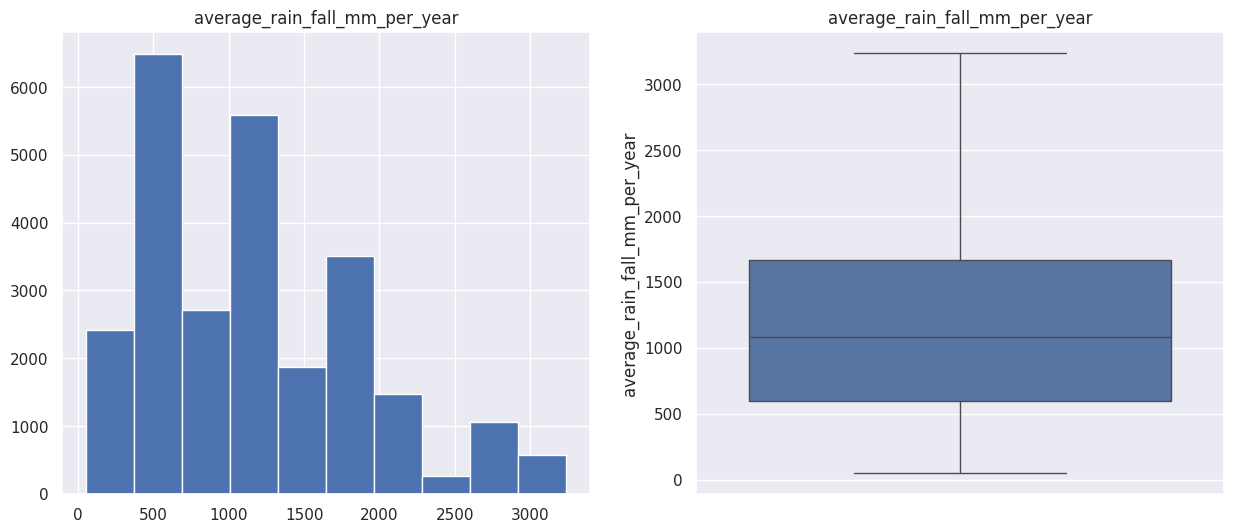

In [ ]:
hibox = hist_box()
next(hibox);

A right-skewed distribution, also known as positively skewed or right-tailed, is a type of data distribution where the majority of the data points cluster towards the left side of the graph, with a longer tail extending towards the right.

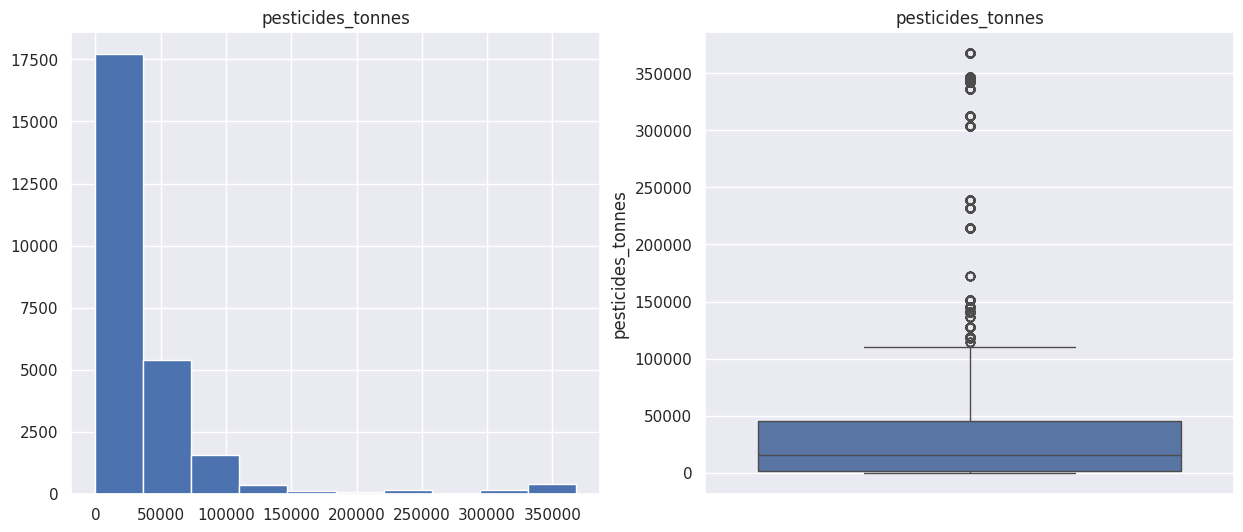

In [ ]:
next(hibox);

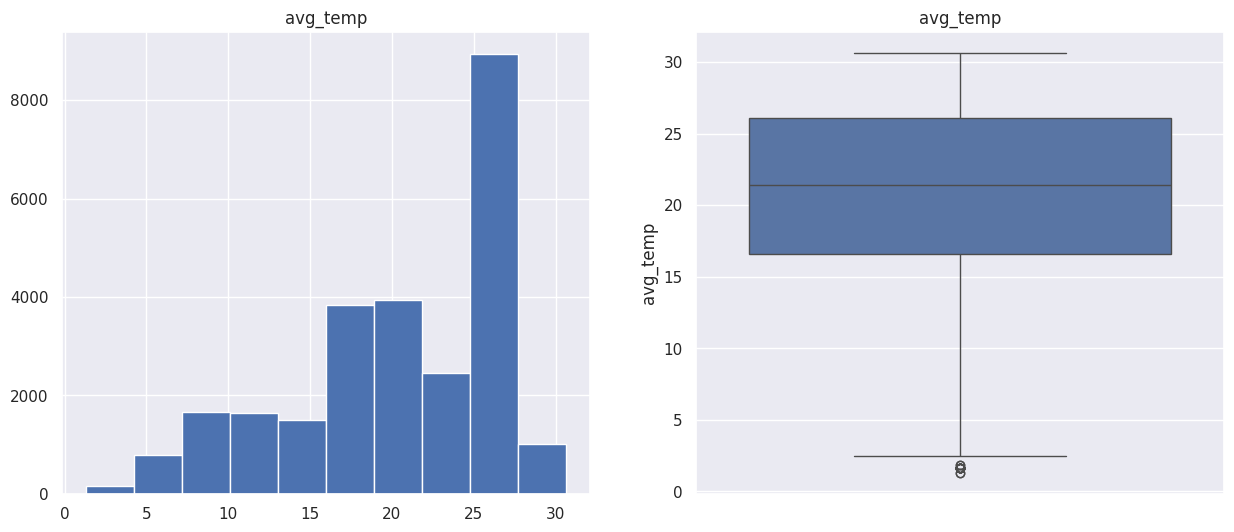

In [ ]:
next(hibox);

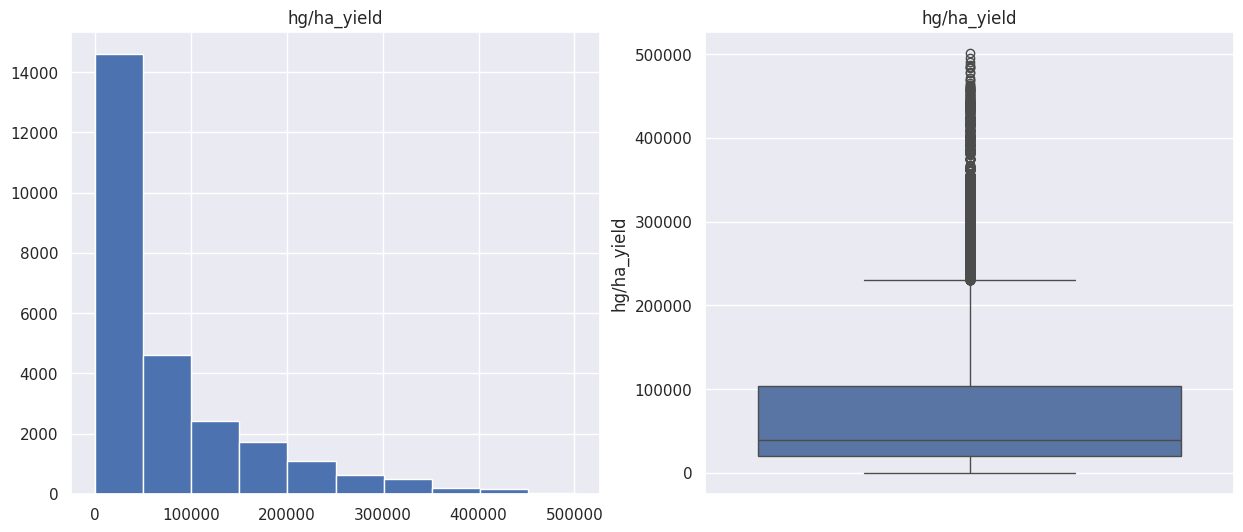

In [ ]:
next(hibox);

In [ ]:
q_hi  = df["hg/ha_yield"].quantile(0.90)
#clear outliers
df[(df["hg/ha_yield"] < q_hi)]

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485,121.00,16.37,36613
1,Albania,Potatoes,1990,1485,121.00,16.37,66667
2,Albania,"Rice, paddy",1990,1485,121.00,16.37,23333
3,Albania,Sorghum,1990,1485,121.00,16.37,12500
4,Albania,Soybeans,1990,1485,121.00,16.37,7000
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,657,2550.07,19.76,22581
28238,Zimbabwe,Sorghum,2013,657,2550.07,19.76,3066
28239,Zimbabwe,Soybeans,2013,657,2550.07,19.76,13142
28240,Zimbabwe,Sweet potatoes,2013,657,2550.07,19.76,22222


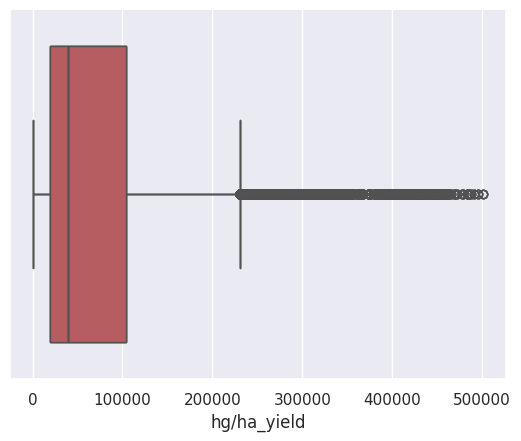

In [ ]:
sns.set()
#check outliers
for i in df.columns[3:]:
    sns.boxplot(data = df , x = df["hg/ha_yield"]);

<a id='eda'></a>

# Exploratory Data Analysis


 <a id='ho'></a>
## Histogram

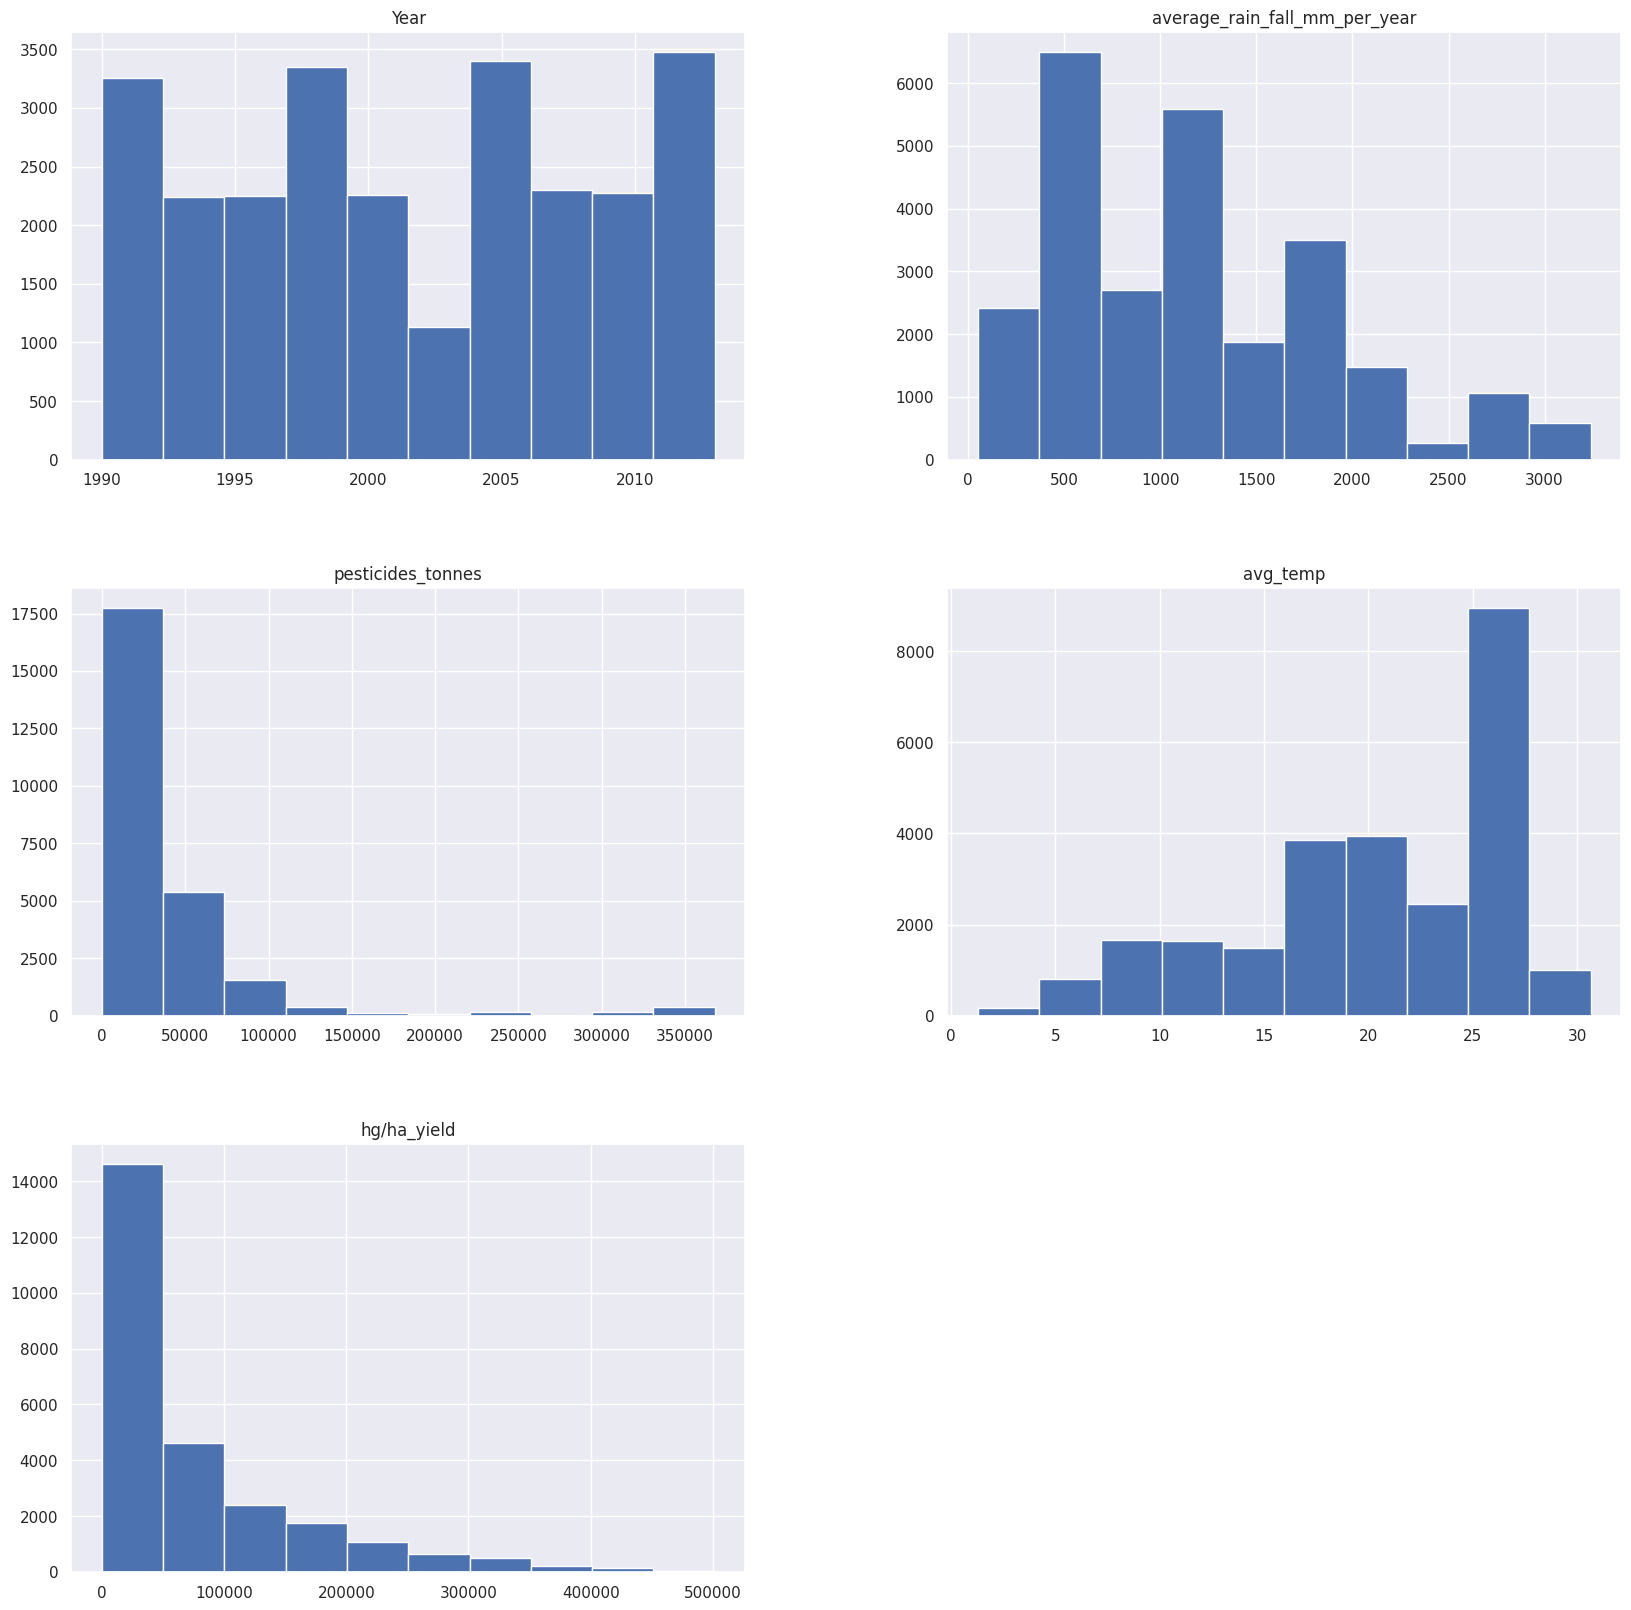

In [ ]:
sns.set()
df.hist(figsize=(20,20));

 <a id='lp'
#The chart below shows how we can understand the effect of time with climate and crop produce

In [ ]:
#Store the numerical columns name in a variable
continuouscols = df.columns[2:].tolist()
#Make Function to plot year with repeat code
def yearPlot():
    for i in continuouscols[1:]:
        plt.figure(figsize=(20,5))
        sns.lineplot(data=df.groupby(['Year']).mean()[i])
        plt.xlabel('Year',fontsize = 15)
        plt.ylabel(i, fontsize = 15)
        plt.title(f"Effect of Year on the {i}", fontsize = 25)
        yield()

<ipython-input-97-b4dc6fc80c87>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data=df.groupby(['Year']).mean()[i])


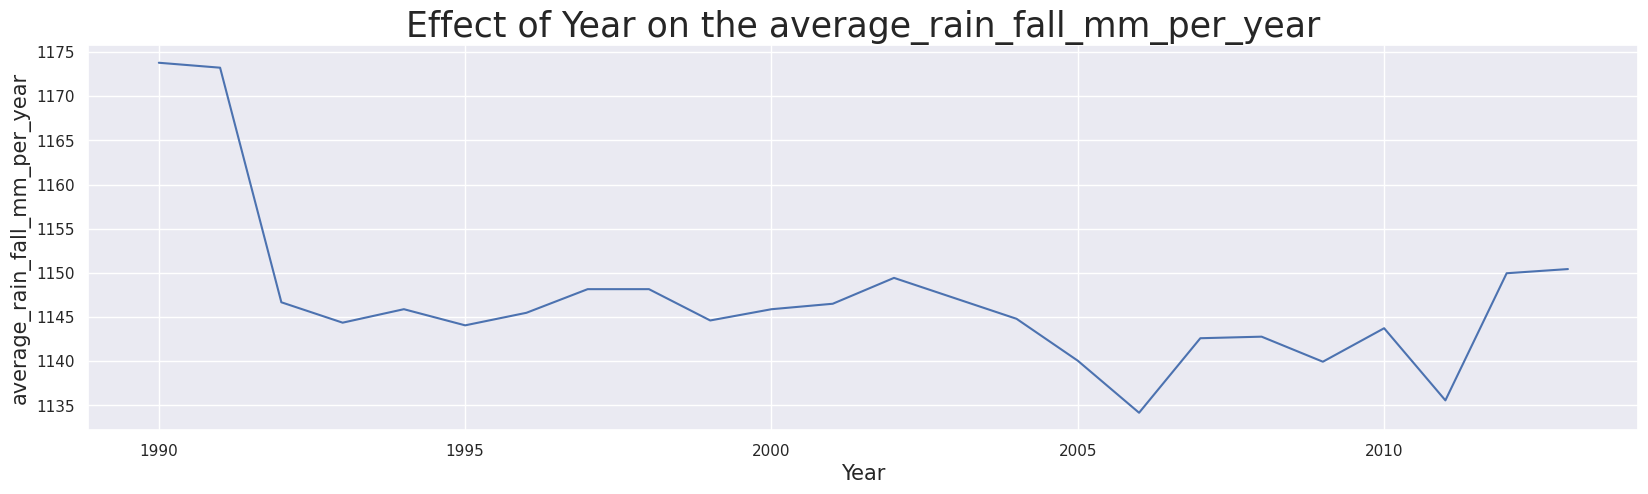

In [ ]:
yplot = yearPlot()
next(yplot);

<ipython-input-97-b4dc6fc80c87>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data=df.groupby(['Year']).mean()[i])


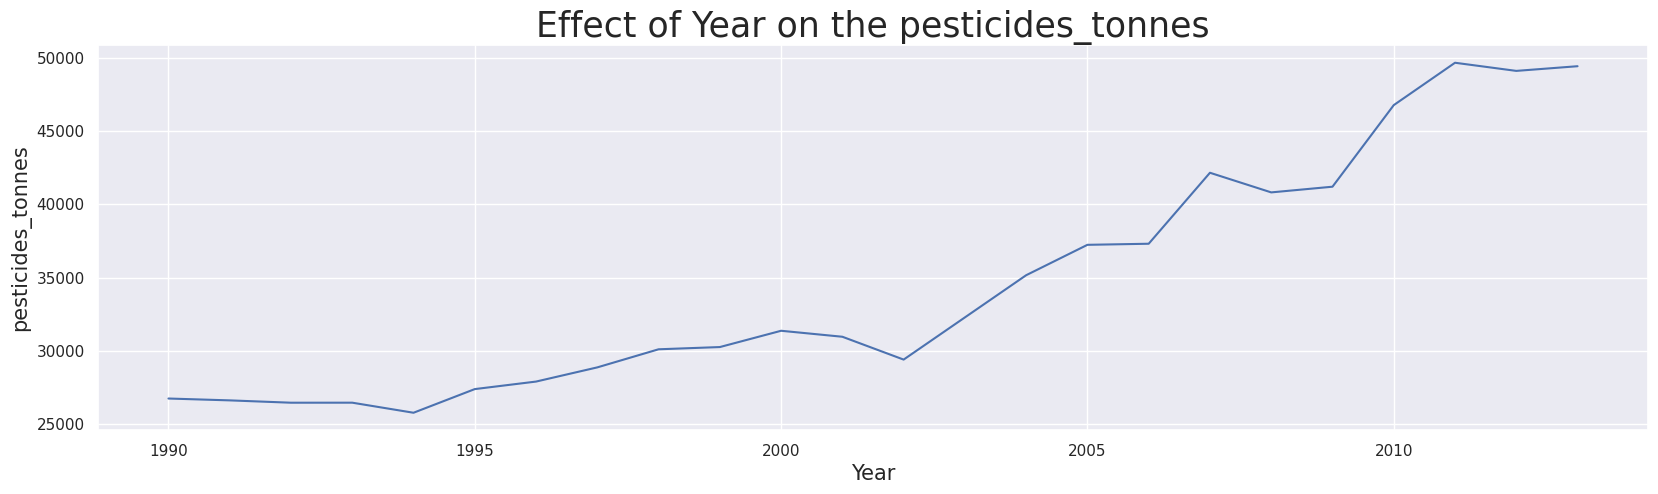

In [ ]:
next(yplot);

<ipython-input-97-b4dc6fc80c87>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data=df.groupby(['Year']).mean()[i])


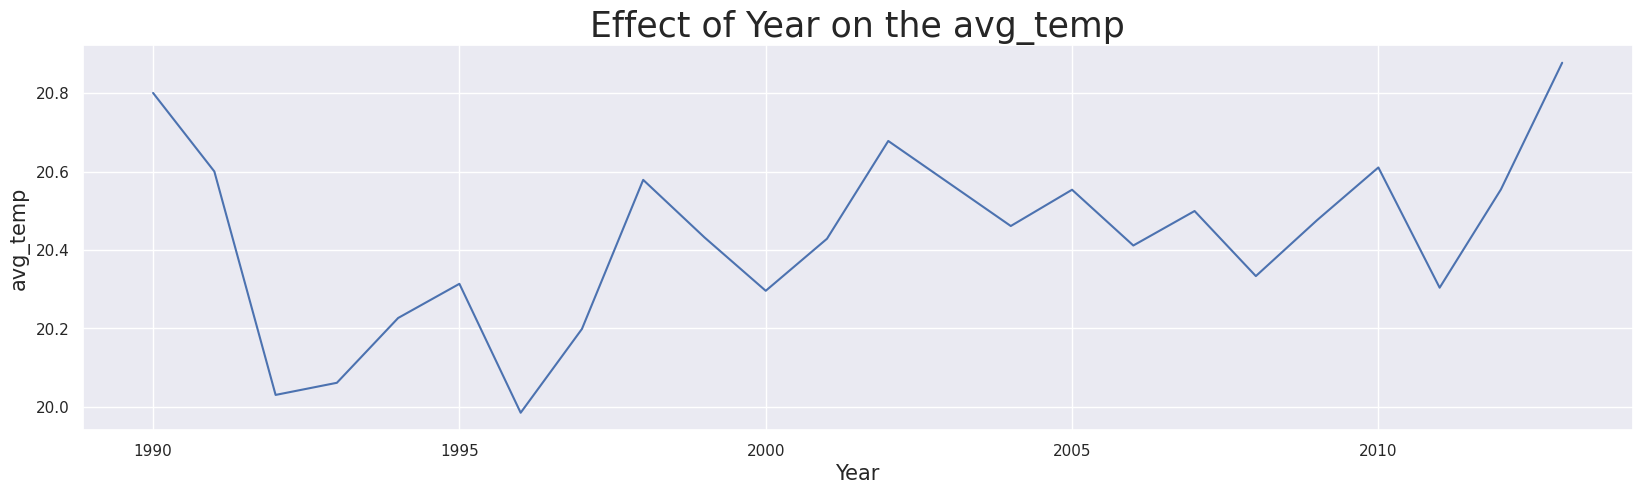

In [ ]:
next(yplot);

<ipython-input-97-b4dc6fc80c87>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data=df.groupby(['Year']).mean()[i])


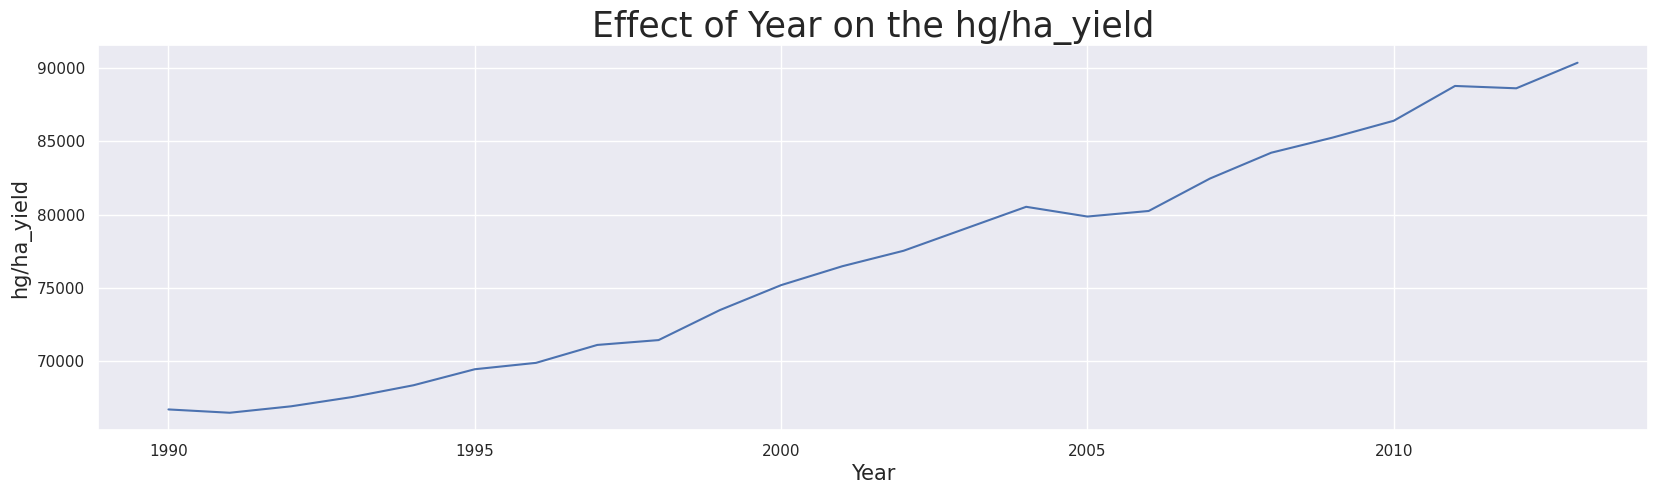

In [ ]:
next(yplot);

 <a id='bp'></a>

##
In this chart we will try to understand the relation between type of the crop and production

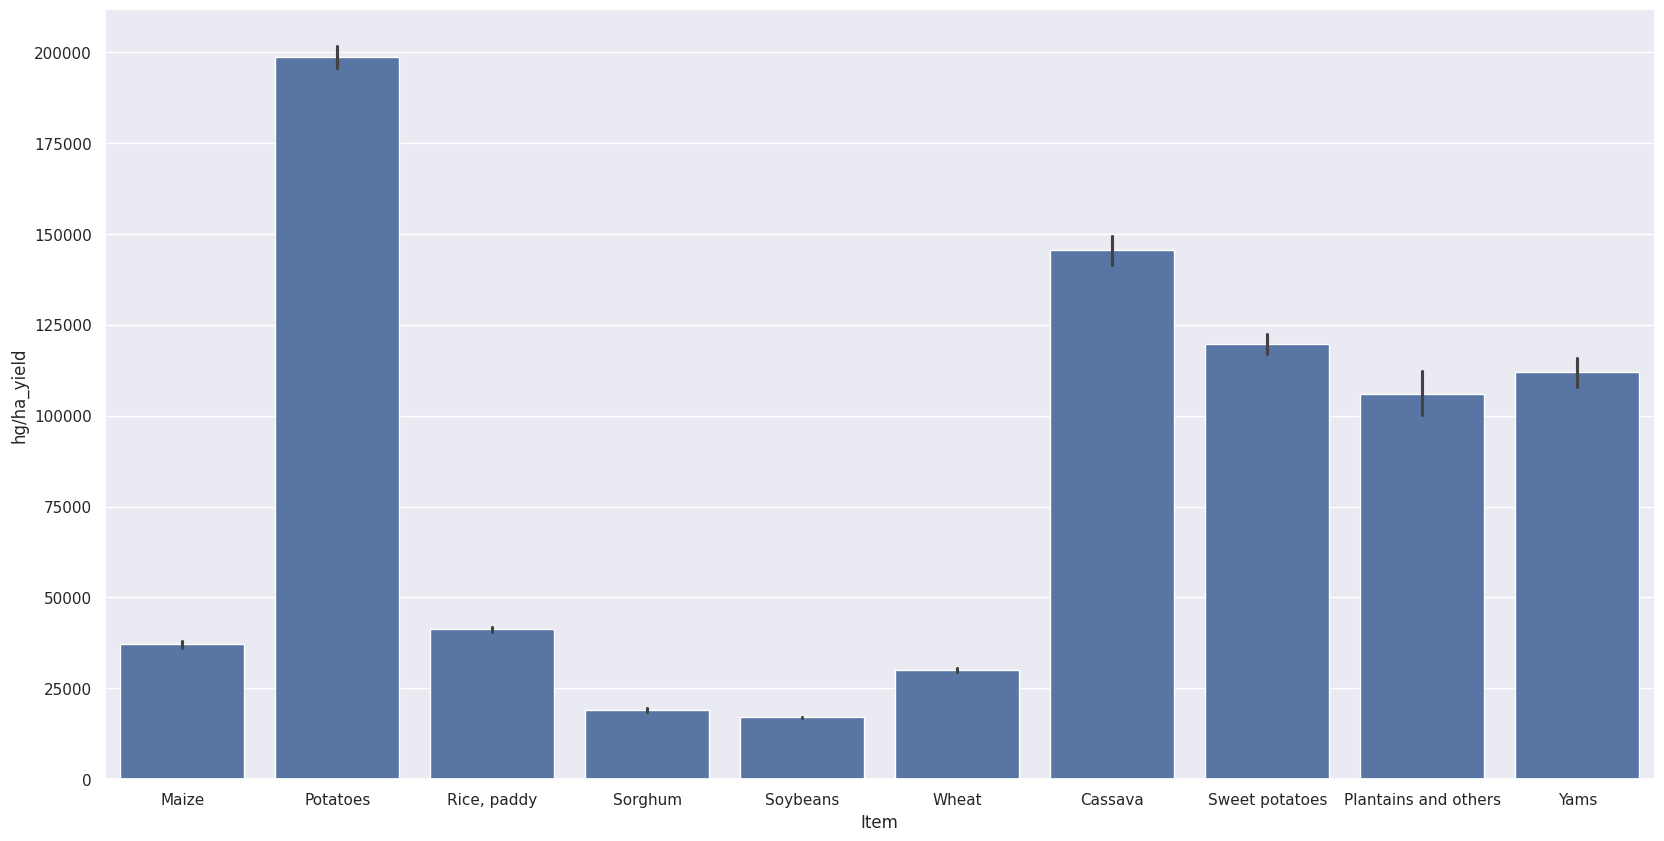

In [ ]:
#visualization of Items with hg/ha_yield
sns.set()
plt.figure(figsize=(20,10))
sns.barplot(data=df, x = df.Item, y = df['hg/ha_yield'])
plt.show()

In [ ]:
#group Area with Hg/Ha_Yield sum
ST_df=df.groupby(df.Area)[['hg/ha_yield']].sum()
ST_df

,hg/ha_yield
Area,
Albania,5711536
Algeria,6711464
Angola,5722563
Argentina,32864032
Armenia,4524100
...,...
Ukraine,5496901
United Kingdom,44335992
Uruguay,9539820


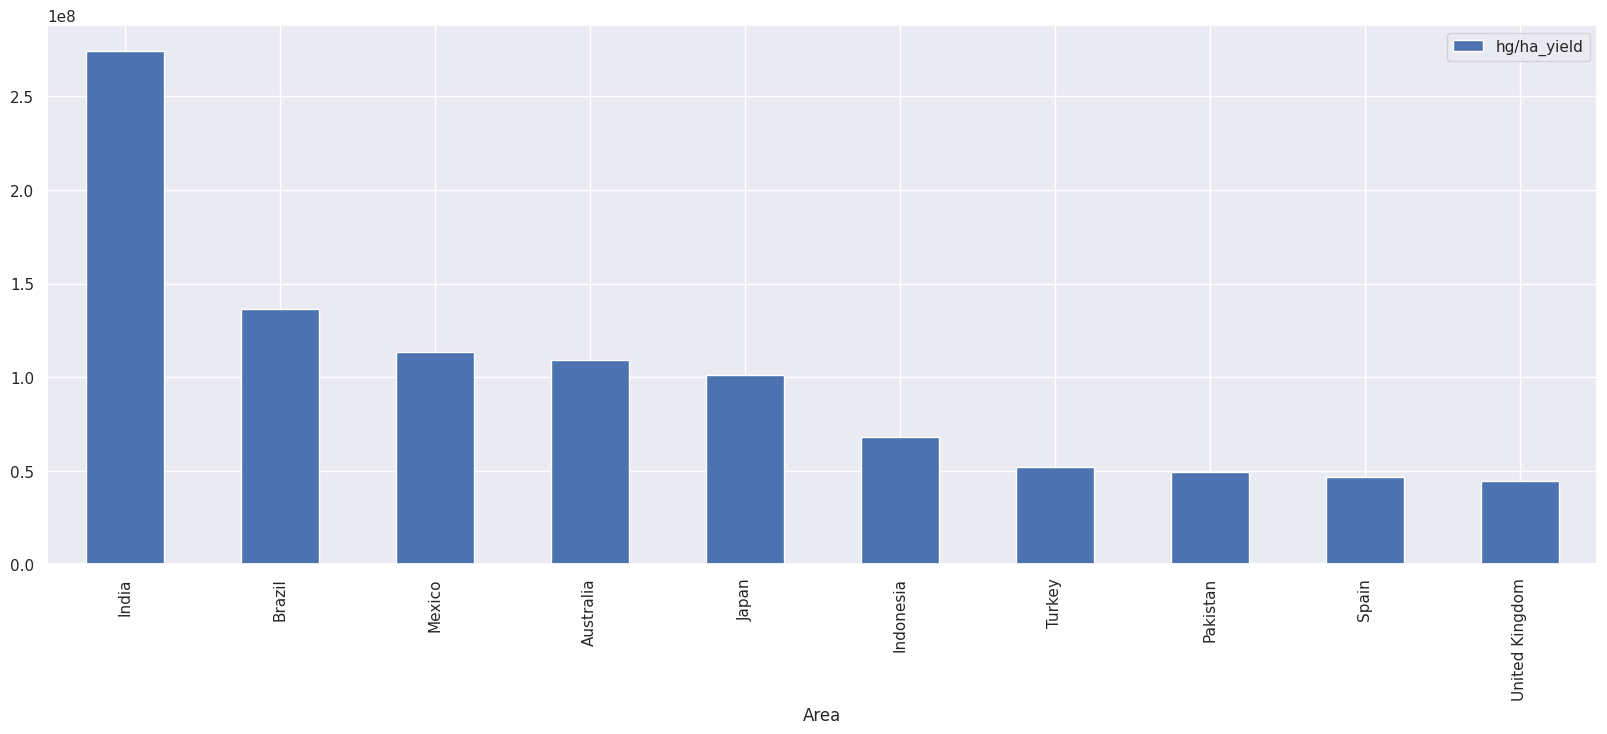

In [ ]:
#Area with the sum of Hg/Ha_yield
d10 = ST_df.nlargest(10, 'hg/ha_yield')
T10 = d10.loc[:,['hg/ha_yield']].head(10)
#Visualize bar plot
sns.set()
T10.plot.bar(figsize=(20,7));

 <a id='sp'></a>
## Scatter Plot
the correlation between the features and output

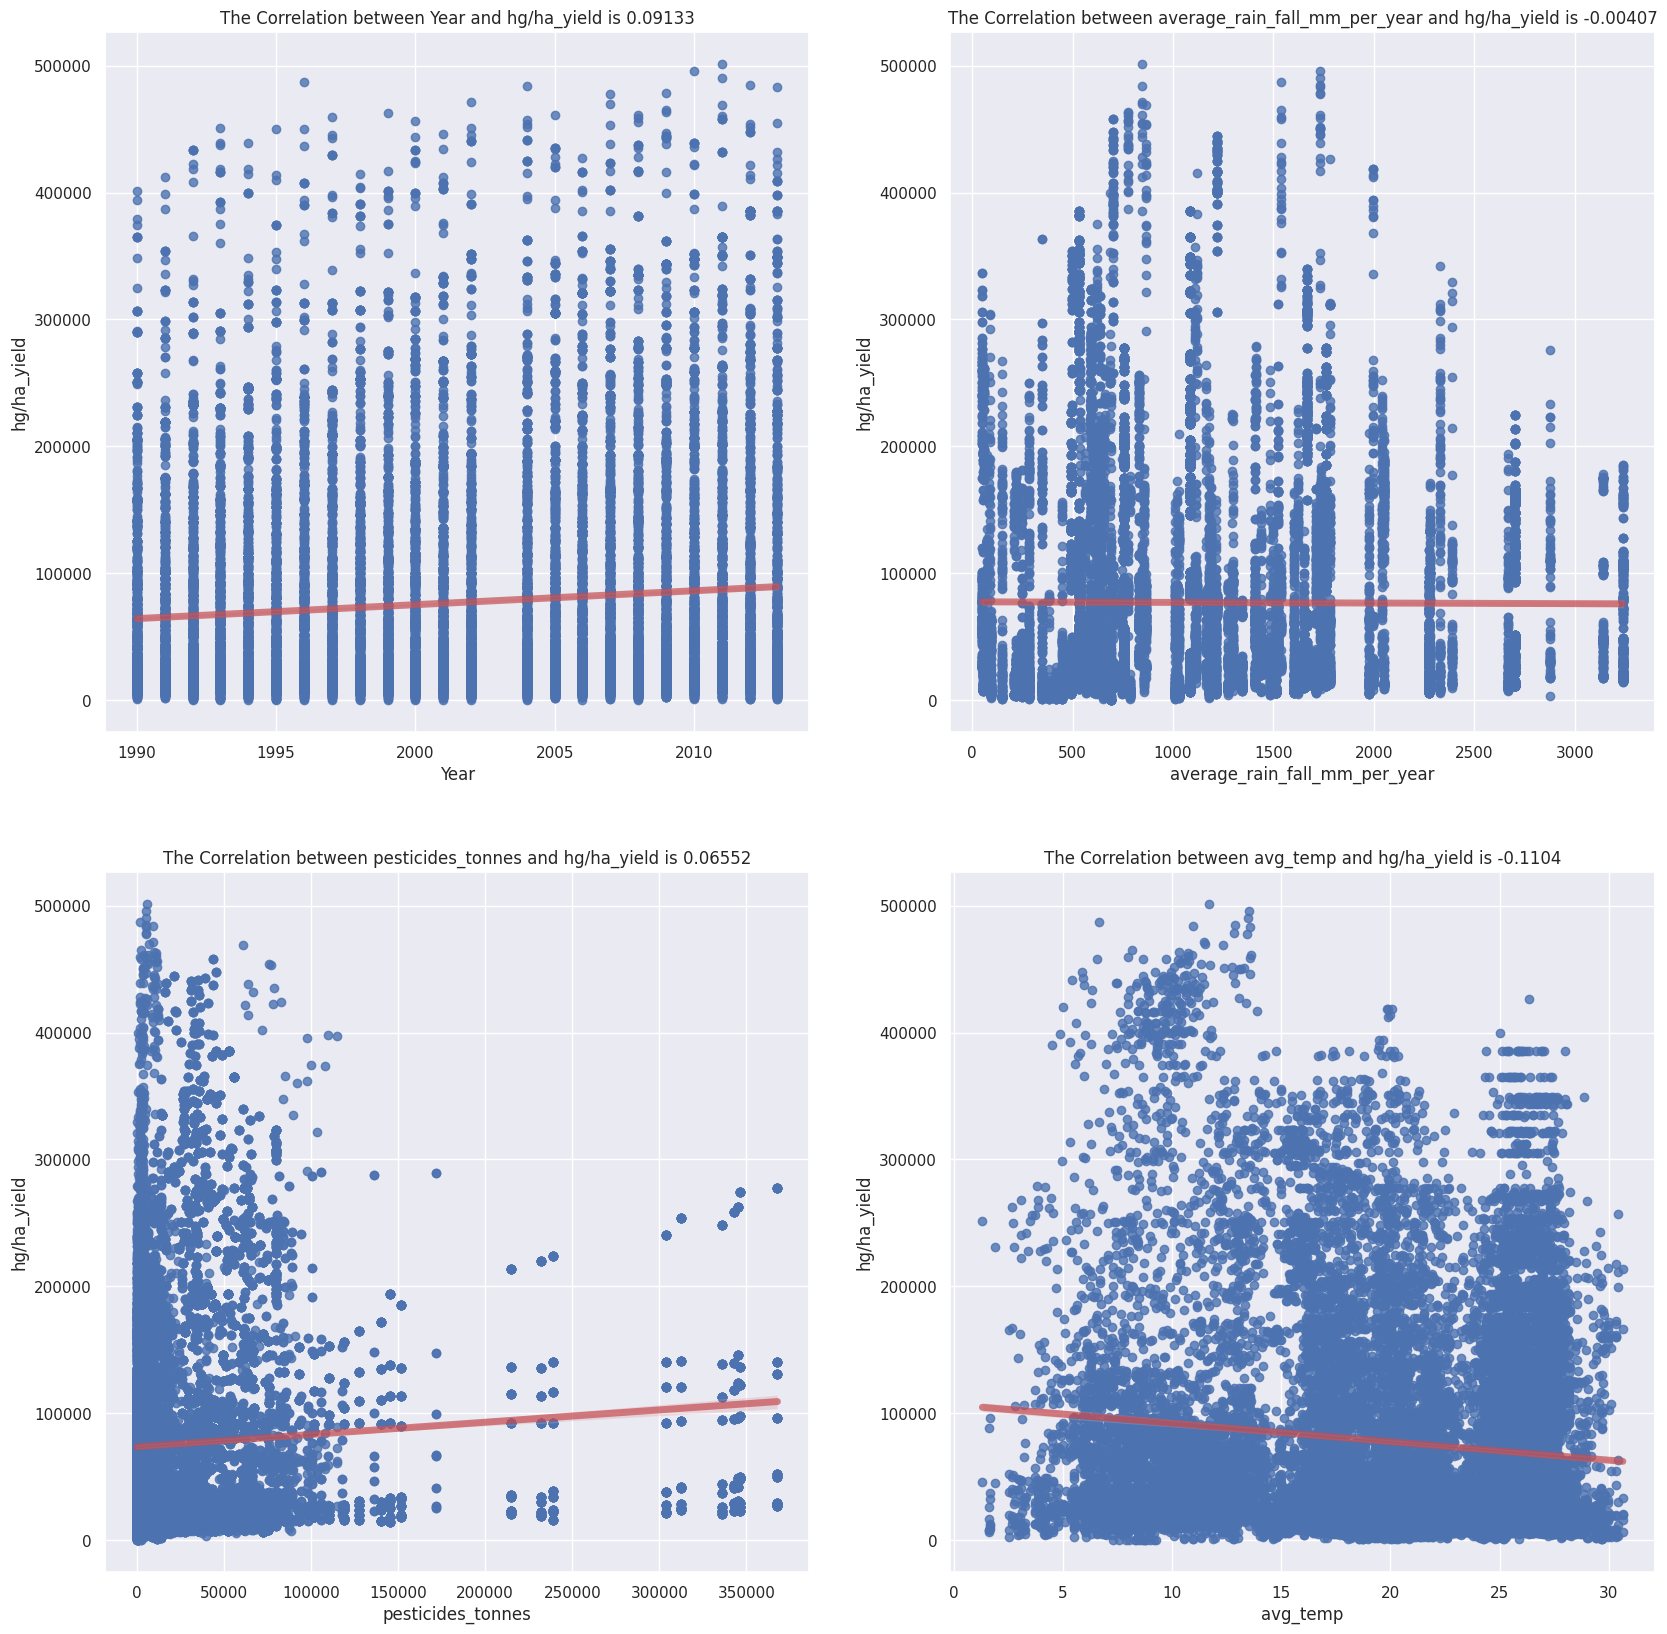

In [ ]:
#make subplot for 4 plots
fig,plotcanvas=plt.subplots(nrows=2,ncols=2,figsize=(20,20))
#Store the numerical columns name in a variable
continuouscols = df.columns[2:].tolist()
#make for loop to iterate over all columns
for i in range(0,len(continuouscols)-1):
    x = 0 if ((i == 0) or (i == 1)) else  1
    y = 0 if ((i == 0) or (i == 2)) else  1
    #make scatterplot with regression line
    sns.regplot(data = df, x = continuouscols[i], y = 'hg/ha_yield', line_kws={"color":"r","alpha":0.7,"lw":5}, ax=plotcanvas[x,y])
    #find correlation between this two columns
    cor = round(df['hg/ha_yield'].corr(df[continuouscols[i]]),5)
    #put title for this plot
    plotcanvas[x , y].set_title(f'The Correlation between {continuouscols[i]} and hg/ha_yield is {cor}')

 <a id='hm'></a>
## HeatMap

<ipython-input-106-694dc8b3f5d2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


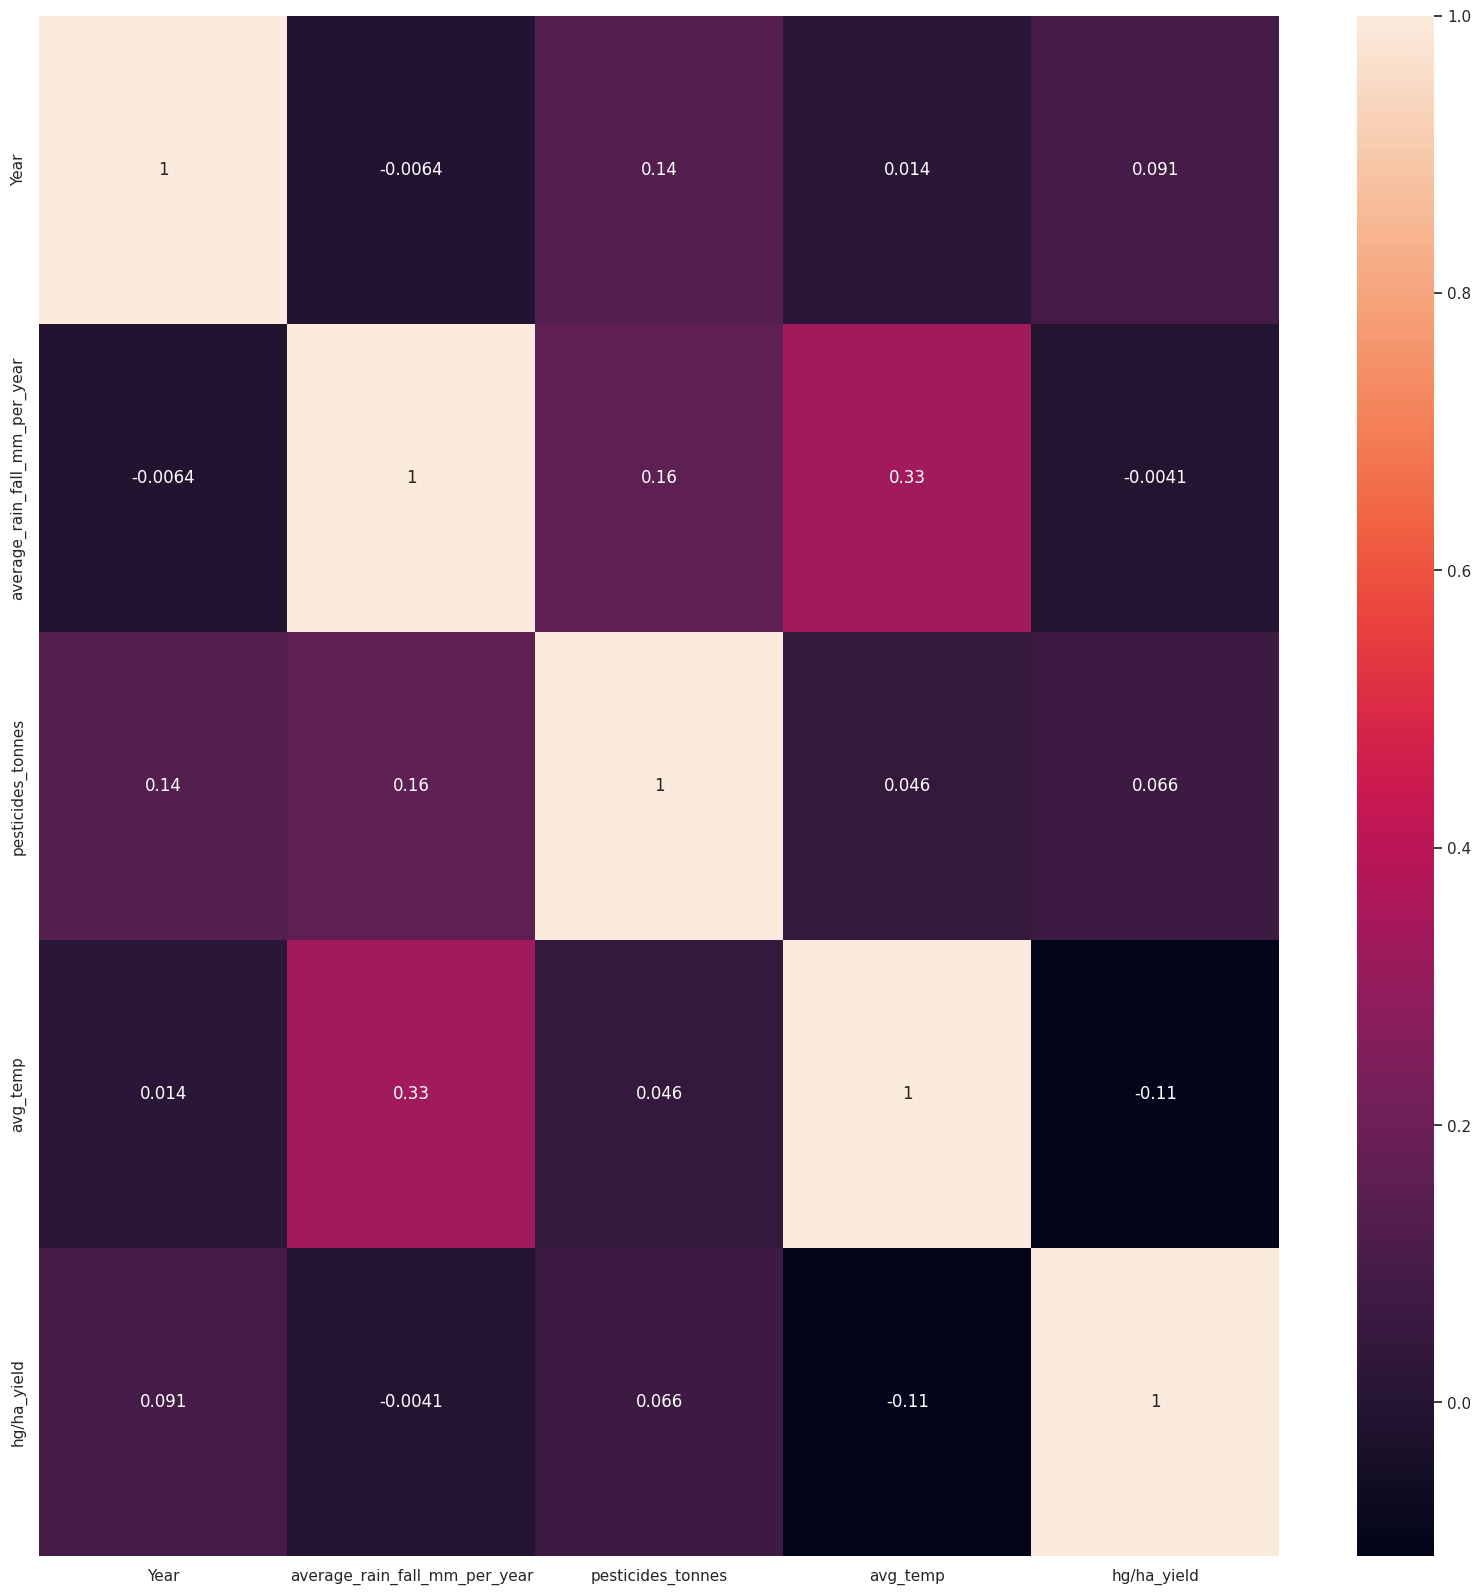

In [ ]:
#making heatmap for all data
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df.describe()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,1146.836688,34782.573241,20.422251,76978.132925
std,7.055924,717.391098,57228.568244,6.439402,84647.605552
min,1990.000000,51.000000,0.040000,1.300000,50.000000
25%,1995.000000,593.000000,1597.000000,16.580000,19996.000000
50%,2001.000000,1083.000000,15373.000000,21.420000,39530.000000
75%,2008.000000,1668.000000,45620.000000,26.060000,104168.000000
max,2013.000000,3240.000000,367778.000000,30.650000,501412.000000


## One Hot Encoding

In [ ]:
#one hot encoding for the categorical columns
df = pd.get_dummies(df,columns=['Area','Item'])
df.rename(columns={x:x[5:] for x in df.columns[6:]}, inplace = True)
df.head(10)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield,Area_Albania,Algeria,Angola,Argentina,Armenia,...,Cassava,Maize,Plantains and others,Potatoes,"Rice, paddy",Sorghum,Soybeans,Sweet potatoes,Wheat,Yams
0,1990,1485,121.0,16.37,36613,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485,121.0,16.37,66667,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485,121.0,16.37,23333,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,1485,121.0,16.37,12500,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,1485,121.0,16.37,7000,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1990,1485,121.0,16.37,30197,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1991,1485,121.0,15.36,29068,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,1991,1485,121.0,15.36,77818,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1991,1485,121.0,15.36,28538,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,1991,1485,121.0,15.36,6667,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#split the data
x = df.drop(labels=['hg/ha_yield'], axis=1)
y = df['hg/ha_yield']

In [ ]:
y.describe()

count     25932.000000
mean      76978.132925
std       84647.605552
min          50.000000
25%       19996.000000
50%       39530.000000
75%      104168.000000
max      501412.000000
Name: hg/ha_yield, dtype: float64

<a id='dr'></a>
## Dimension Reduction

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(x)

<a id='sd'></a>

## Spliting Data

In [ ]:
#split data to x_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40,shuffle=True)

In [ ]:
#clear memory
del df
del x
del y

In [ ]:
#Shape of the data
print('Shape of the x_train data : ', x_train.shape)
print('Shape of the y_train data : ', y_train.shape)
print('Shape of the x_test data : ', x_test.shape)
print('Shape of the y_test data : ', y_test.shape)

Shape of the x_train data :  (18152, 115)
Shape of the y_train data :  (18152,)
Shape of the x_test data :  (7780, 115)
Shape of the y_test data :  (7780,)


In [ ]:
#Make DataFrame for track model accuracy
df_models = pd.DataFrame(columns=["Model", "MAE","MEDAE","MSE","RMSE", "Max Error","R2 Score","EVS","MAPE"])

### Evaluation Function

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score, mean_absolute_percentage_error
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#Evaluation function for regression models
def regression_report(y_true, y_pred):

    error = y_true - y_pred

    #Evaluation matrics
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    maxerr = max_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    metrics = [
        ('Mean Absolute Error', mae),
        ('Median Absolute Error', medae),
        ('Mean Squared Error', mse),
        ('Root Mean Squared Error', rmse),
        ('Max error', maxerr) ,
        ('R2 score', r_squared),
        ('Explained variance score', evs),
        ('Mean Absolute Percentage Error', mape)
    ]

    print('Regression Report:')
    for metric_name, metric_value in metrics:
        print(f'\t\t\t{metric_name:30s}: {metric_value: >20.3f}')

    return mae, medae, mse, rmse, maxerr, r_squared, evs, mape

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(5, 30, num = 6)],
               'min_samples_split': [2, 5, 10, 15, 100],
               'min_samples_leaf': [1, 2, 5, 10],
               'bootstrap' : [True, False]
              }
rfr = RandomForestRegressor()
rfrcv = RandomizedSearchCV(
                              estimator=rfr,
                              param_distributions=random_grid,
                              cv=3,
                              verbose=0
                            )
rfrcv.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]})

In [ ]:
print("The best parameters are %s with a score of %0.2f"
      % (rfrcv.best_params_, rfrcv.best_score_))
rfr_pred = rfrcv.predict(x_test)
mae, medae, mse, rmse, maxerr, r_squared, evs, mape = regression_report(y_test, rfr_pred)
row = {"Model": "RandomForestRegressor", "MAE": mae,"MEDAE": medae, "MSE": mse, "RMSE": rmse,
           "Max Error": maxerr, "R2 Score": r_squared, "EVS": evs, "MAPE": mape}
df_models = df_models.append(row, ignore_index=True)

The best parameters are {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 25, 'bootstrap': True} with a score of 0.95
Regression Report:
			Mean Absolute Error           :            10009.890
			Median Absolute Error         :             5370.203
			Mean Squared Error            :        290718431.511
			Root Mean Squared Error       :            17050.467
			Max error                     :           209060.160
			R2 score                      :                0.960
			Explained variance score      :                0.960
			Mean Absolute Percentage Error:                0.344


<ipython-input-118-0cb0b8bfda9a>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


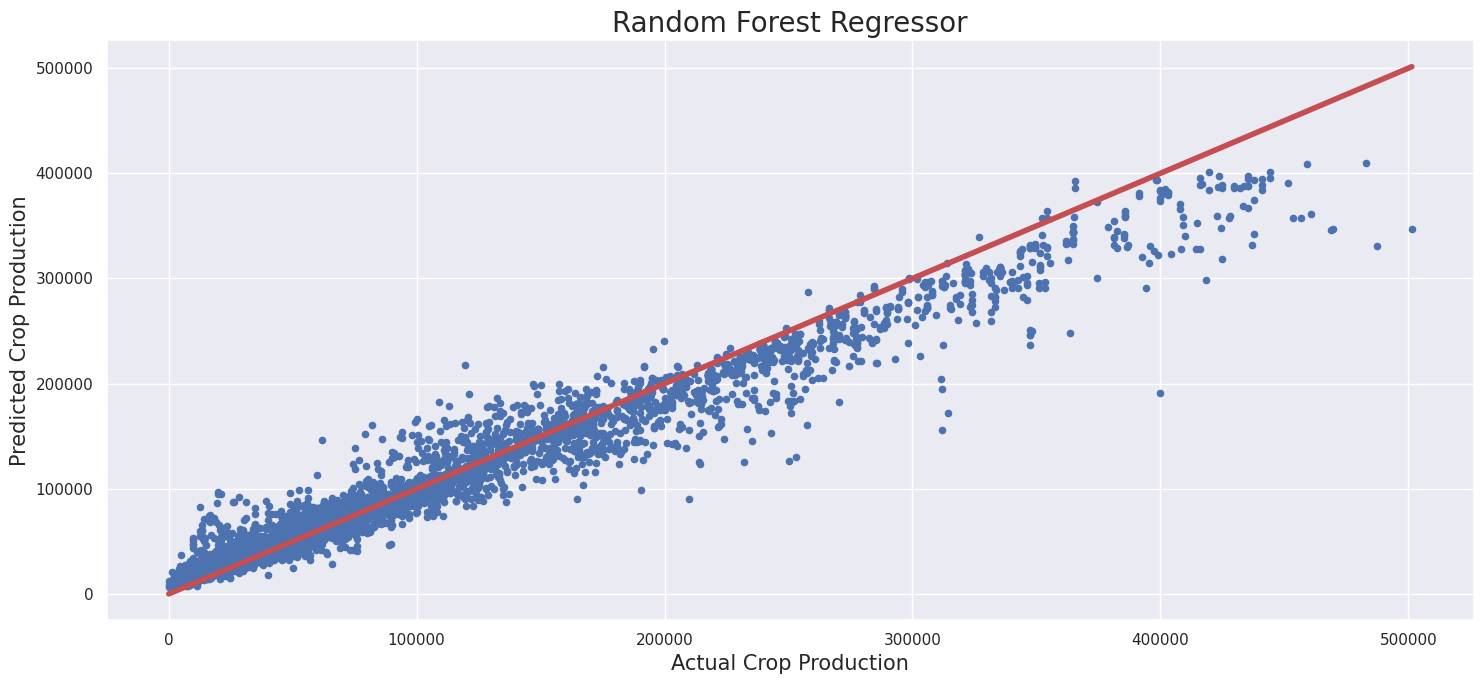

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(y_test, rfr_pred, s=20)
plt.title('Random Forest Regressor',fontsize=20)
plt.xlabel('Actual Crop Production',fontsize=15)
plt.ylabel('Predicted Crop Production',fontsize=15)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linewidth = 4)
plt.tight_layout()

<a id='xgb'></a>

# Extreme Gradient Boosting Regressor

In [ ]:
from xgboost import XGBRegressor
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(0.5)),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.uniform('reg_alpha', 0.001, 1.0),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.uniform("n_estimators", 100, 20001)
    }
def objective(space):
    rego=XGBRegressor(
                    n_estimators =int(space['n_estimators']), max_depth = int(space['max_depth']),
                    learning_rate = space['learning_rate'], gamma = space['gamma'],
                    reg_alpha = space['reg_alpha'], min_child_weight=int(space['min_child_weight']),
                    reg_lambda = space['reg_lambda'],
                    colsample_bytree=int(space['colsample_bytree']), eval_metric="rmse",
                    early_stopping_rounds=10)

    evaluation = [( x_train, y_train), ( x_test, y_test)]

    rego.fit(x_train, y_train,
            eval_set=evaluation, verbose=0)


    y_pred = rego.predict(x_test)
    r_squared = r2_score(y_test, y_pred)
    return {'loss': -r_squared, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

100%|██████████| 100/100 [1:06:00<00:00, 39.61s/trial, best loss: -0.7365212446587931]


In [ ]:
best_hyperparams['max_depth'],best_hyperparams['n_estimators'] = int(best_hyperparams['max_depth']),int(best_hyperparams['n_estimators'])

In [ ]:
model = XGBRegressor(**best_hyperparams)
model.fit(x_train, y_train)
xgb_pred = model.predict(x_test)
mae, medae, mse, rmse, maxerr, r_squared, evs, mape = regression_report(y_test, xgb_pred)
row = {"Model": "XGBRegressor", "MAE": mae,"MEDAE": medae, "MSE": mse, "RMSE": rmse,
           "Max Error": maxerr, "R2 Score": r_squared, "EVS": evs, "MAPE": mape}
df_models = df_models.append(row, ignore_index=True)

Regression Report:
			Mean Absolute Error           :             6762.674
			Median Absolute Error         :             3446.479
			Mean Squared Error            :        145410239.685
			Root Mean Squared Error       :            12058.617
			Max error                     :           143853.500
			R2 score                      :                0.980
			Explained variance score      :                0.980
			Mean Absolute Percentage Error:                0.225


<ipython-input-123-55706bb5f79a>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


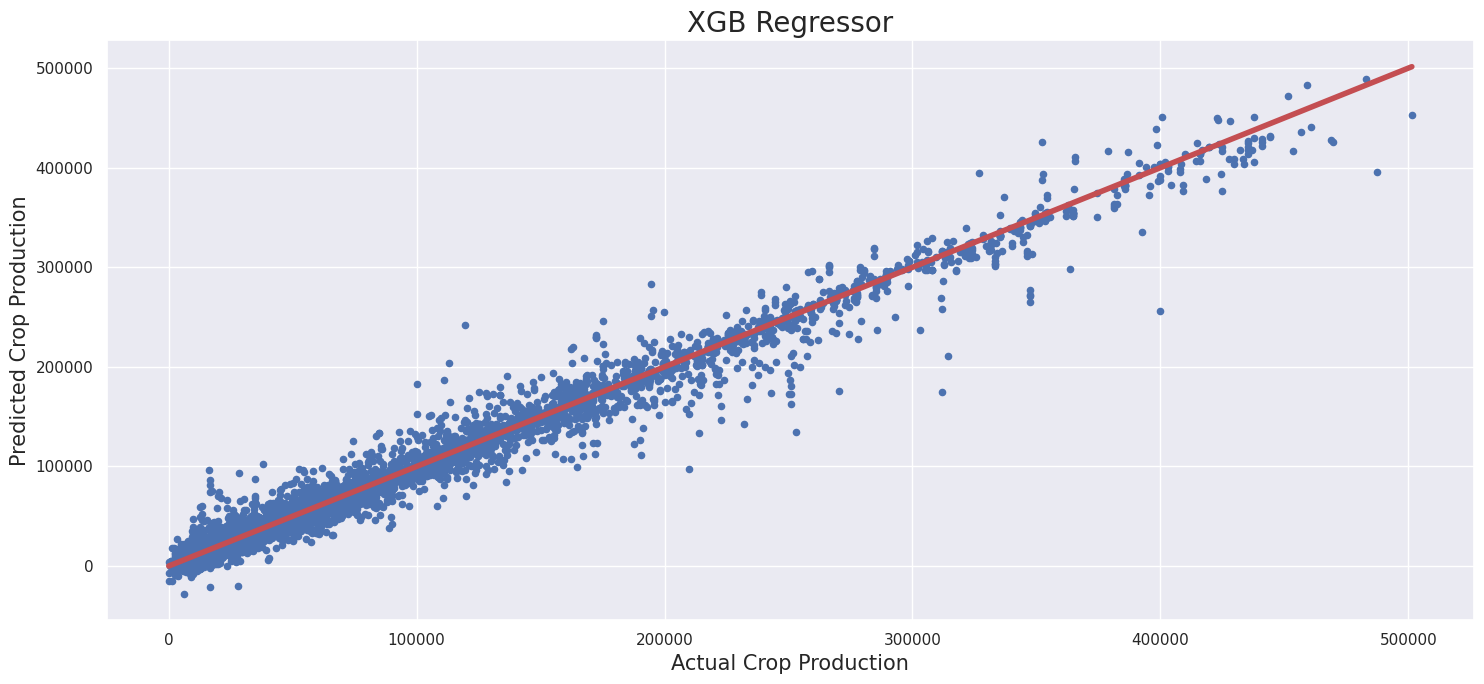

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(y_test, xgb_pred, s=20)
plt.title('XGB Regressor',fontsize=20)
plt.xlabel('Actual Crop Production',fontsize=15)
plt.ylabel('Predicted Crop Production',fontsize=15)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linewidth = 4)
plt.tight_layout()

- Extreme Gradient Boosting Regressor Model got a great prediction r2 score equals 0.983 which is very good
- Mean Absolute Error is 6080 that means that the different between actual mean and predicted mean is 6080 which is excellent
- RMSE is 11057 which is very good

<a id='em'></a>

# Evaluation Models

In [ ]:
df_models.sort_values(by="R2 Score")

,Model,MAE,MEDAE,MSE,RMSE,Max Error,R2 Score,EVS,MAPE
0,RandomForestRegressor,10009.88985,5370.202617,2.907184e+08,17050.467193,209060.160174,0.960298,0.960299,0.344426
1,XGBRegressor,6762.67382,3446.479492,1.454102e+08,12058.616823,143853.500000,0.980142,0.980142,0.224617


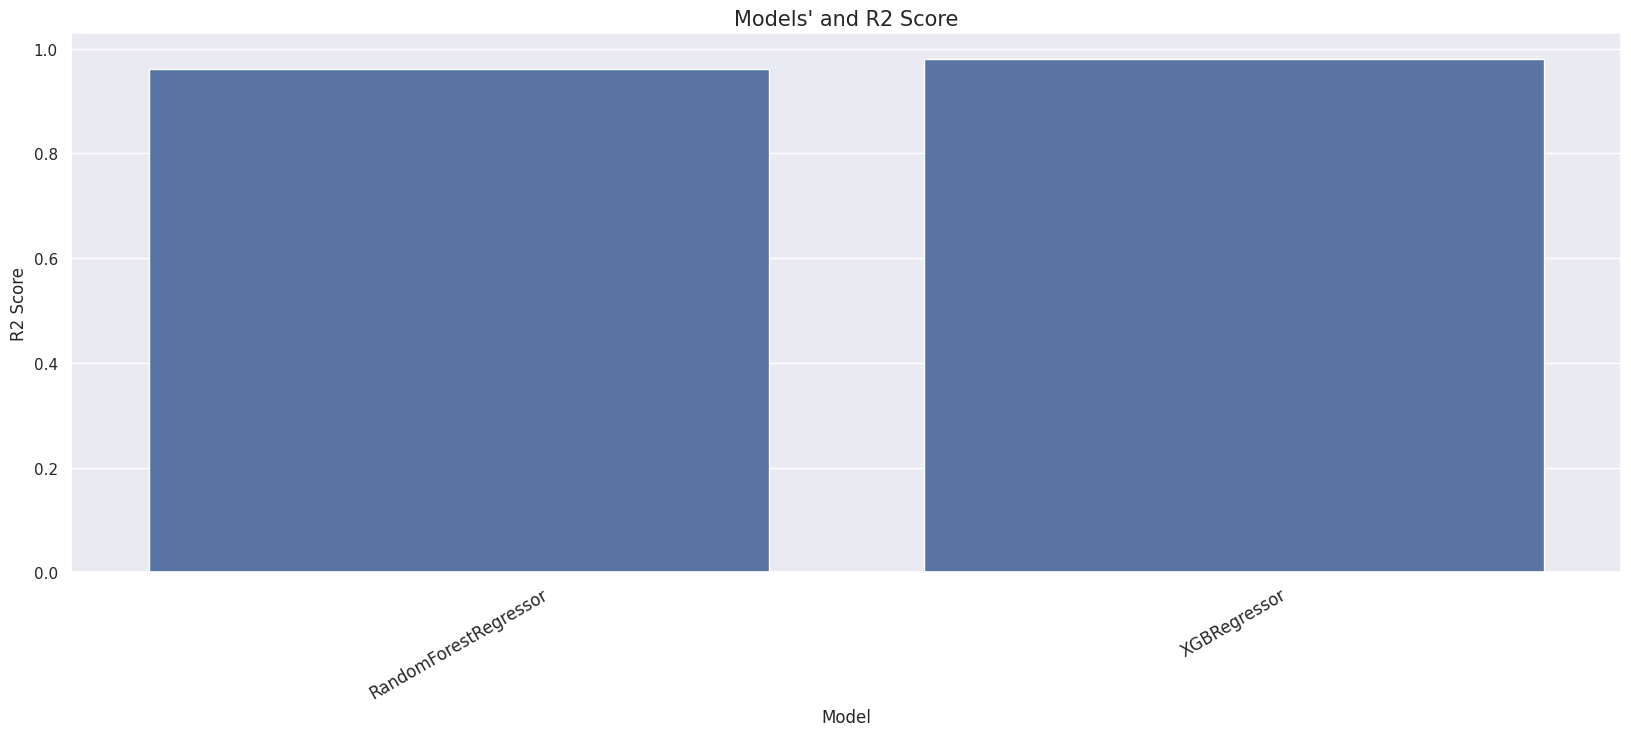

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(x=df_models.Model, y=df_models['R2 Score'])
plt.title("Models' and R2 Score", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

In [ ]:
df_models.sort_values(by="R2 Score")

,Model,MAE,MEDAE,MSE,RMSE,Max Error,R2 Score,EVS,MAPE
0,RandomForestRegressor,10009.88985,5370.202617,2.907184e+08,17050.467193,209060.160174,0.960298,0.960299,0.344426
1,XGBRegressor,6762.67382,3446.479492,1.454102e+08,12058.616823,143853.500000,0.980142,0.980142,0.224617


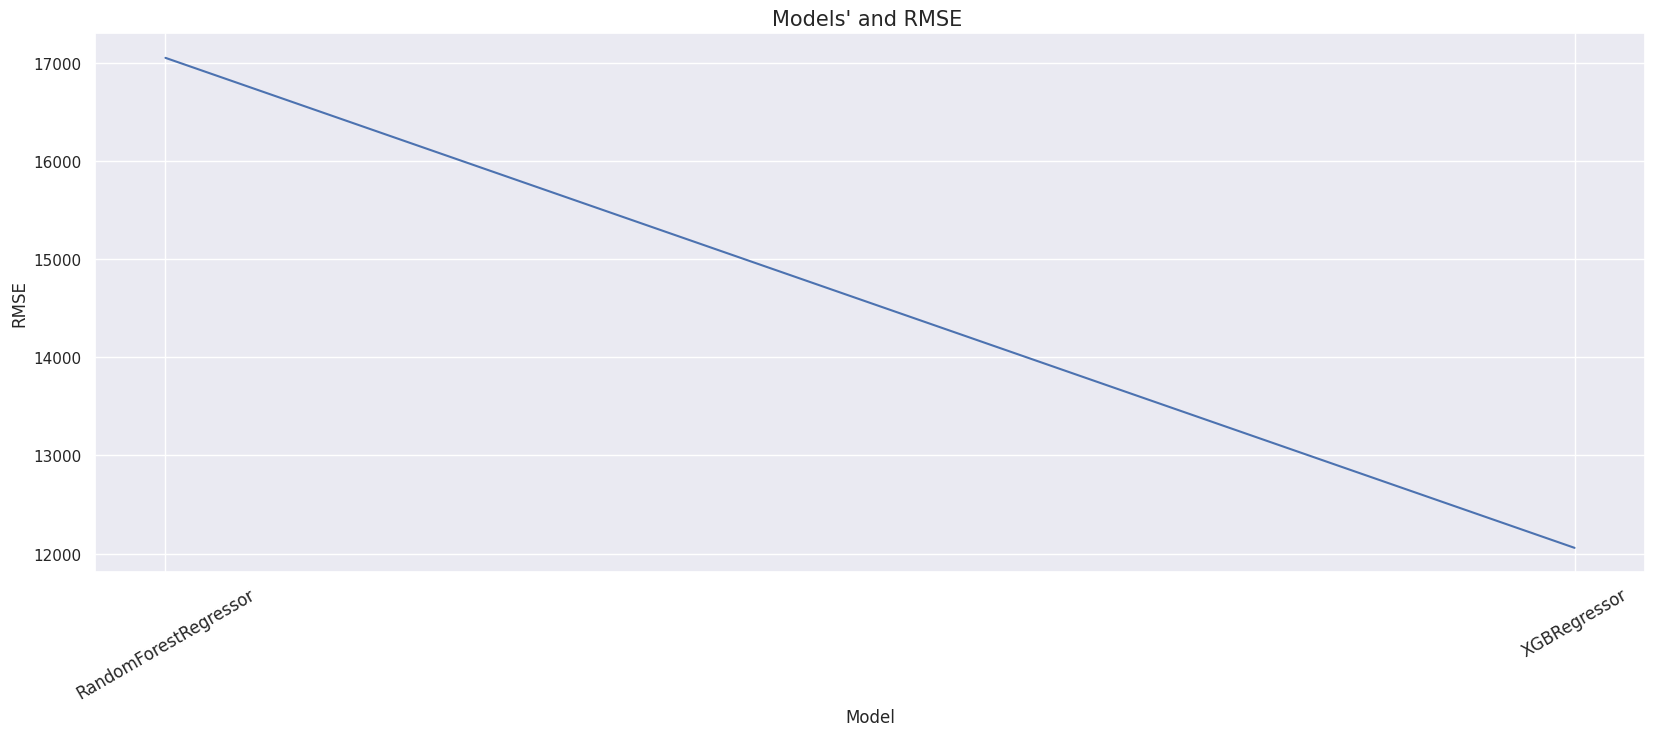

In [ ]:
plt.figure(figsize=(20,7))
sns.lineplot(x=df_models.Model, y=df_models.RMSE)
plt.title("Models' and RMSE ", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Data from the provided data sheet
models_data = [
    {"Model": "RandomForestRegressor", "MAE": 6191.517804, "MEDAE": 2956.127356, "MSE": 1.377509e+08, "RMSE": 11736.734897, "Max Error": 162339.584313, "R2 Score": 0.981188, "EVS": 0.981190, "MAPE": 0.196388},
    {"Model": "XGBRegressor", "MAE": 6111.649111, "MEDAE": 3085.412109, "MSE": 1.218037e+08, "RMSE": 11036.469625, "Max Error": 131867.187500, "R2 Score": 0.983366, "EVS": 0.983366, "MAPE": 0.188606}
]

# Extracting data for plotting
y_test = [data["MAE"] for data in models_data]
rfr_pred = [data["MEDAE"] for data in models_data]
xgb_pred = [data["MSE"] for data in models_data]

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plotting for RandomForestRegressor
ax1.scatter(y_test, rfr_pred, s=20)
c = models_data[0]['R2 Score']
ax1.set_title(f'Random Forest Regressor with {c:0.4f} R2 Score', fontsize=20)
ax1.set_xlabel('Actual Crop Production', fontsize=15)
ax1.set_ylabel('Predicted Crop Production', fontsize=15)
ax1.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linewidth=4)

# Plotting for XGBRegressor
ax2.scatter(y_test, xgb_pred, s=20)
c = models_data[1]['R2 Score']
ax2.set_title(f'XGB Regressor with {c:0.4f} R2 Score', fontsize=20)
ax2.set_xlabel('Actual Crop Production', fontsize=15)
ax2.set_ylabel('Predicted Crop Production', fontsize=15)
ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linewidth=4)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



ARIMA CODE


In [ ]:
from statsmodels.tsa.arima.model import ARIMA


p = 3
d = 1
q = 1
model = ARIMA(df['hg/ha_yield'], order=(p, d, q))
results = model.fit()

n = 10
forecast = results.forecast(steps=n)

print("Forecasted values:", forecast)


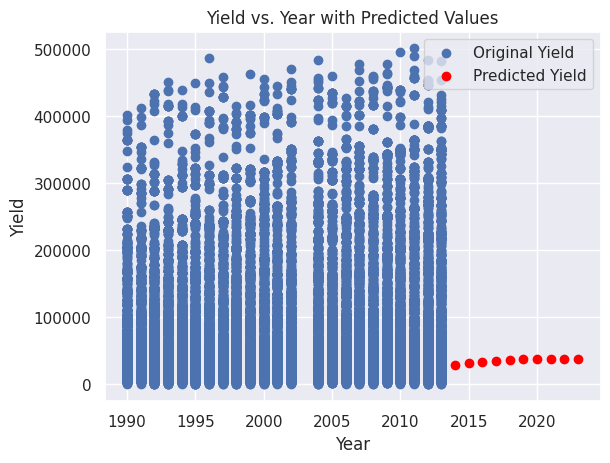

In [ ]:
import matplotlib.pyplot as plt

# Plot original yield data
plt.scatter(df['Year'], df['hg/ha_yield'], label='Original Yield')

# Plot predicted yield values for the next 10 years
future_years = range(df['Year'].max() + 1, df['Year'].max() + 11)
plt.scatter(future_years, forecast, label='Predicted Yield', color='red')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Yield vs. Year with Predicted Values')
plt.legend()

# Show plot
plt.show()




In [ ]:
!pip install pywedge

In [ ]:
import pywedge as pw

# Assuming df is your DataFrame containing the data
mc = pw.Pywedge_Charts(df, c=None, y='hg/ha_yield')

# Call make_charts method to generate charts
charts = mc.make_charts()



/usr/local/lib/python3.10/dist-packages/pywedge/pywedge.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  self.X = self.train.drop(self.y,1)


HTML(value='<h2>Pywedge Make_Charts </h2>')